### Задание №1.
К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

Напишем функцию, принимающую k ближайших соседей `neighbours` и в зависимости от значения `weighted` вычисляющую наиболее встречаемый класс среди соседей обычно или взвешенно:

In [2]:
def get_max_common_class(neighbours, weighted):
    classes = {class_item: 0 for class_item in set(y_train)}
    
    max_dist = neighbours[-1, 0] - neighbours[0, 0]
    if weighted and (max_dist != 0):
        for dist, class_ in neighbours[:-1]:
            weight = (neighbours[-1, 0] - dist) / max_dist
            classes[class_] += weight
    else:
        for dist in neighbours[:-1]:
            classes[dist[1]] += 1
    
    return sorted(classes, key=classes.get)[-1]

Немного поправим функцию `knn`, для более эффективных вычисленний с помощью библиотеки `numpy`:

In [3]:
def knn(x_train, y_train, x_test, k, weighted=True):
    
    answers = []
    for x in x_test:
        test_distances = np.stack((np.linalg.norm(x_train - x, axis=1), y_train), axis=1)
            
        sorted_ind = test_distances.argsort(axis=0)[:k+1, 0]
        
        k_neighbours = test_distances[sorted_ind]
                
        answers.append(get_max_common_class(k_neighbours, weighted))
    
    return np.array(answers)

In [4]:
def accuracy(pred, real):
    return (pred == real).sum() / real.shape[0]

Загрузим датасет, используемый в методичке:

In [5]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

Предскажем значения классов и построим графики зависимости значений точности от количества ближайших соседей в случае обычного определения наиболее встречаемого класса среди соседей и взвешенного:

In [6]:
accuracies = [accuracy(knn(X_train, y_train, X_test, k, weighted=False), y_test) for k in range(1, 21)]

In [7]:
accuracies_weighted = [accuracy(knn(X_train, y_train, X_test, k, weighted=True), y_test) for k in range(1, 21)]

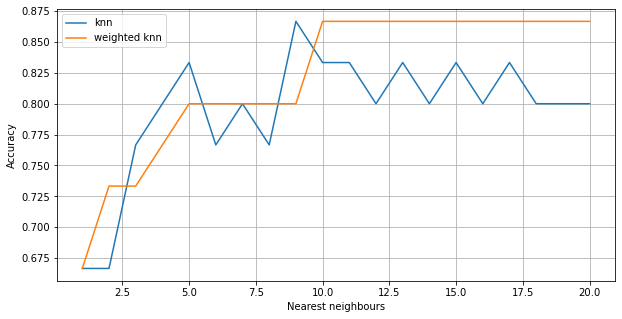

In [8]:
plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy')
plt.xlabel('Nearest neighbours')
plt.plot(range(1, len(accuracies) + 1), accuracies, label='knn')
plt.plot(range(1, len(accuracies_weighted) + 1), accuracies_weighted, label='weighted knn')
plt.legend()
plt.grid()

В случае взвешенного определения наиболее встречаемого класса точность монотонно растет с ростом количества ближайших соседей, что нельзя сказать об алгоритме knn при равнозначном определении наиболее встречаемого класса среди соседей.